In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from strategies import QuantitativeMomentum, EasyRebalance

# Download data

In [2]:
STARTING_CAPITAL = 10_000
STARTING_DAY = '2018-01-01'

ftsemib_index = yf.download(tickers='FTSEMIB.MI')["Adj Close"].loc["2018-01-01":]
benchmark = (ftsemib_index / ftsemib_index.iloc[0]) * STARTING_CAPITAL

ftsemib_tickers = pd.read_excel("FTSEMIB_tickers.xlsx").sort_values(by='ticker', ignore_index=True)
ftsemib_data = yf.download(list(ftsemib_tickers["ticker"])).loc['2016':]
display(ftsemib_tickers.head())
display(ftsemib_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  40 of 40 completed


,ticker,name,sector
0,A2A.MI,A2a,public_services
1,AMP.MI,Amplifon,health
2,AZM.MI,Azimut,financial_services
3,BAMI.MI,Banco Bpm,bank
4,BC.MI,Brunello Cucinelli,consumer_market


Price      Adj Close                                                      \
Ticker        A2A.MI    AMP.MI     AZM.MI   BAMI.MI      BC.MI   BMED.MI   
Date                                                                       
2016-01-04  0.840246  7.508281  12.027952  7.662897  15.454478  4.509539   
2016-01-05  0.849857  7.565487  11.891706  7.719243  15.121613  4.447941   
2016-01-06  0.844365  7.484446  11.646460  7.387434  14.741195  4.165894   
2016-01-07  0.853289  7.541651  11.319466  7.281005  14.427350  4.068635   
2016-01-08  0.847797  7.322362  11.008819  6.980498  14.199100  4.062151   

Price                                                  ...    Volume  \
Ticker          BMPS.MI    BPE.MI   BPSO.MI    CPR.MI  ...    REC.MI   
Date                                                   ...             
2016-01-04  2435.847412  3.706424  3.250684  3.665896  ...  367925.0   
2016-01-05  2369.168945  3.752891  3.228354  3.727349  ...  456698.0   
2016-01-06  2283.737305  3.586157  3.158172  3.670623  ...  179721.0   
2016-01-07  2208.724121  3.504156  3.116701  3.585534  ...  392653.0   
2016-01-08  2173.301025  3.424888  3.028974  3.576080  ...  312566.0   

Price                                                                \
Ticker         SPM.MI      SRG.MI    STLAM.MI   STMMI.MI     TEN.MI   
Date                                                                  
2016-01-04   974058.0  17624520.0  27068333.0  4286769.0  3378741.0   
2016-01-05   607575.0  15815528.0  25131882.0  3413667.0  3019336.0   
2016-01-06   808293.0  14541976.0  28467440.0  3981822.0  4969669.0   
2016-01-07  1112292.0  20766565.0  25910209.0  4851475.0  5288747.0   
2016-01-08   681723.0  20906102.0  23954673.0  6098422.0  5358044.0   

Price                                                       
Ticker           TIT.MI      TRN.MI      UCG.MI     UNI.MI  
Date                                                        
2016-01-04   84630790.0  10328889.0  10625769.0  2412808.0  
2016-01-05   67791490.0   8136729.0   7335513.0  2177551.0  
2016-01-06   90695107.0   6714901.0  13823273.0  2239114.0  
2016-01-07  109247197.0  11538286.0  22822774.0  2629170.0  
2016-01-08   81033983.0  10598587.0  14040029.0  1841866.0  

[5 rows x 240 columns]

# Easy rebalance comparison

In [3]:
rebalance_frequancies = [30, 90, 180, 360]
stocks = list(ftsemib_tickers['ticker'])
er_strategies = dict()

for reb_freq in rebalance_frequancies:
    strategy = EasyRebalance()
    strategy.strategy_simulation(ftsemib_data, stocks, STARTING_DAY, STARTING_CAPITAL, reb_freq)
    er_strategies[reb_freq] = strategy

100%|██████████| 1601/1601 [00:01<00:00, 956.01it/s] 


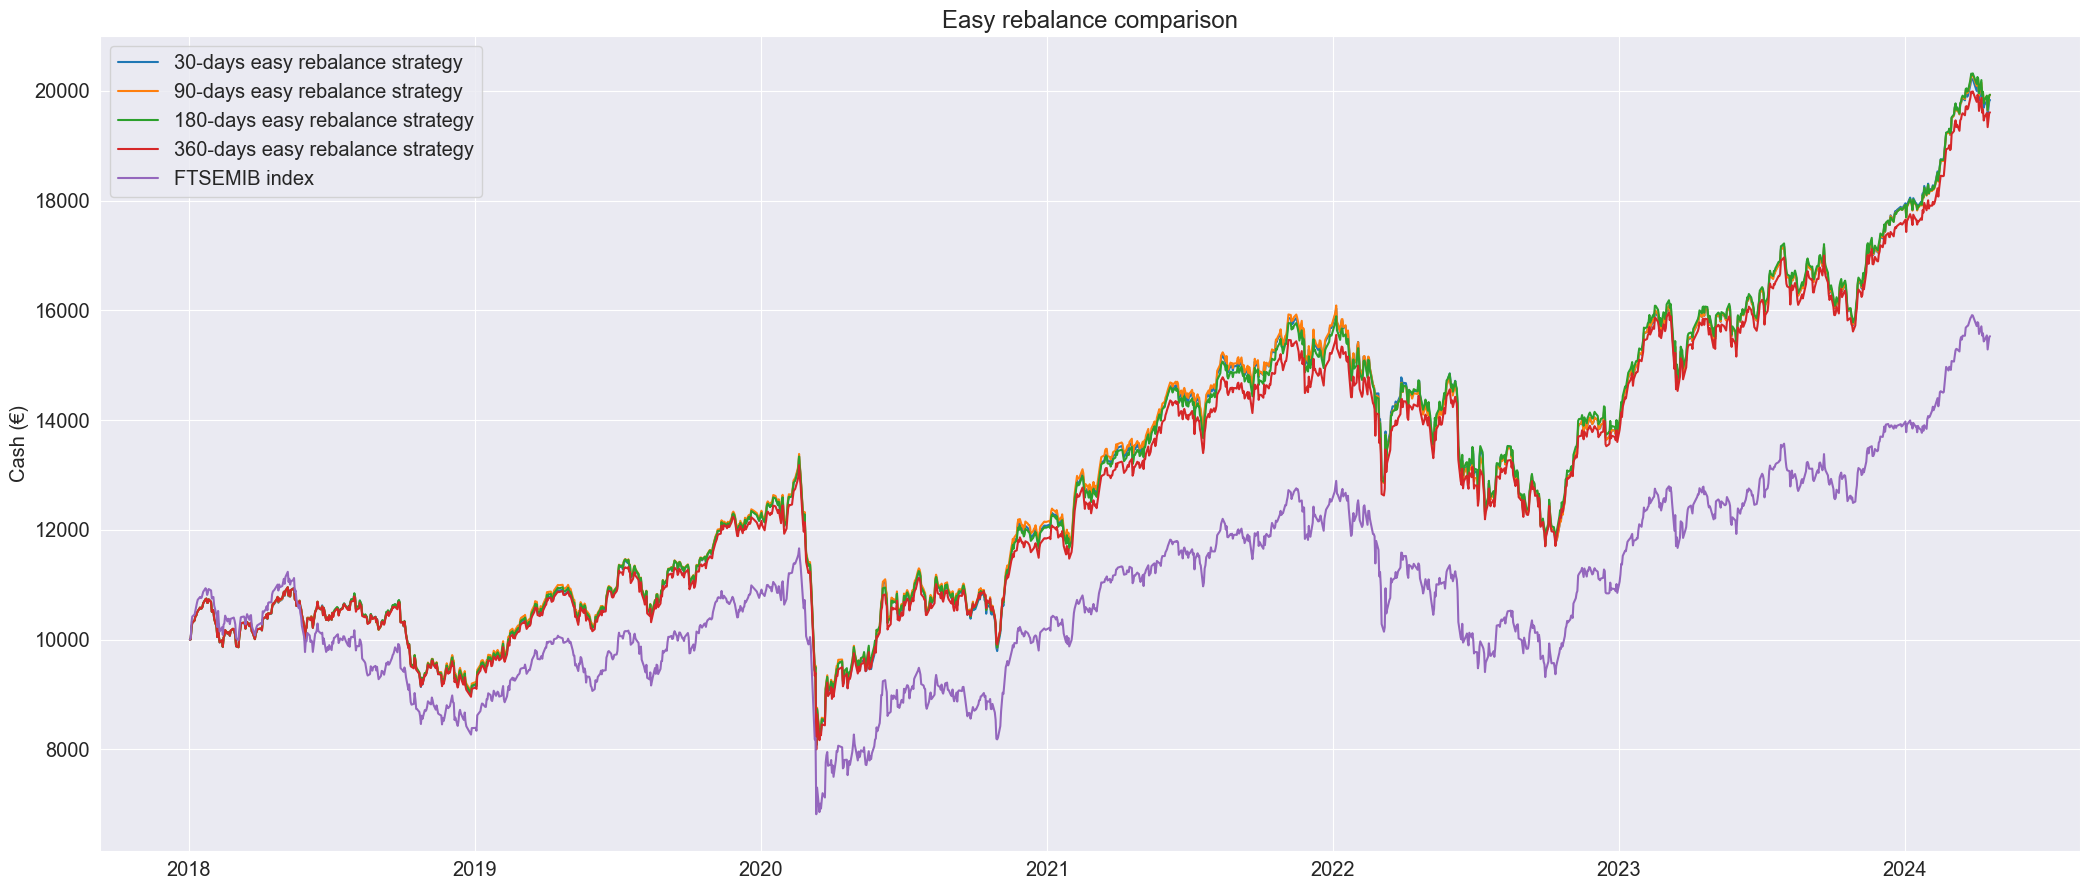

In [4]:
fig1, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for reb_freq in rebalance_frequancies:
    strategy_performance = (er_strategies[reb_freq].history['strategy cumulative returns'] +
                            er_strategies[reb_freq].history['available money'])
    ax.plot(strategy_performance, label=f'{reb_freq}-days easy rebalance strategy')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Easy rebalance comparison', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Quantitative momentum comparison

In [5]:
sizes = [10, 15, 20, 25]
qm_strategies = dict()
for size in sizes:
    strategy = QuantitativeMomentum()
    strategy.strategy_simulation(ftsemib_data, STARTING_DAY, size, STARTING_CAPITAL, reb_freq)
    qm_strategies[size] = strategy

100%|██████████| 1601/1601 [00:02<00:00, 794.68it/s]


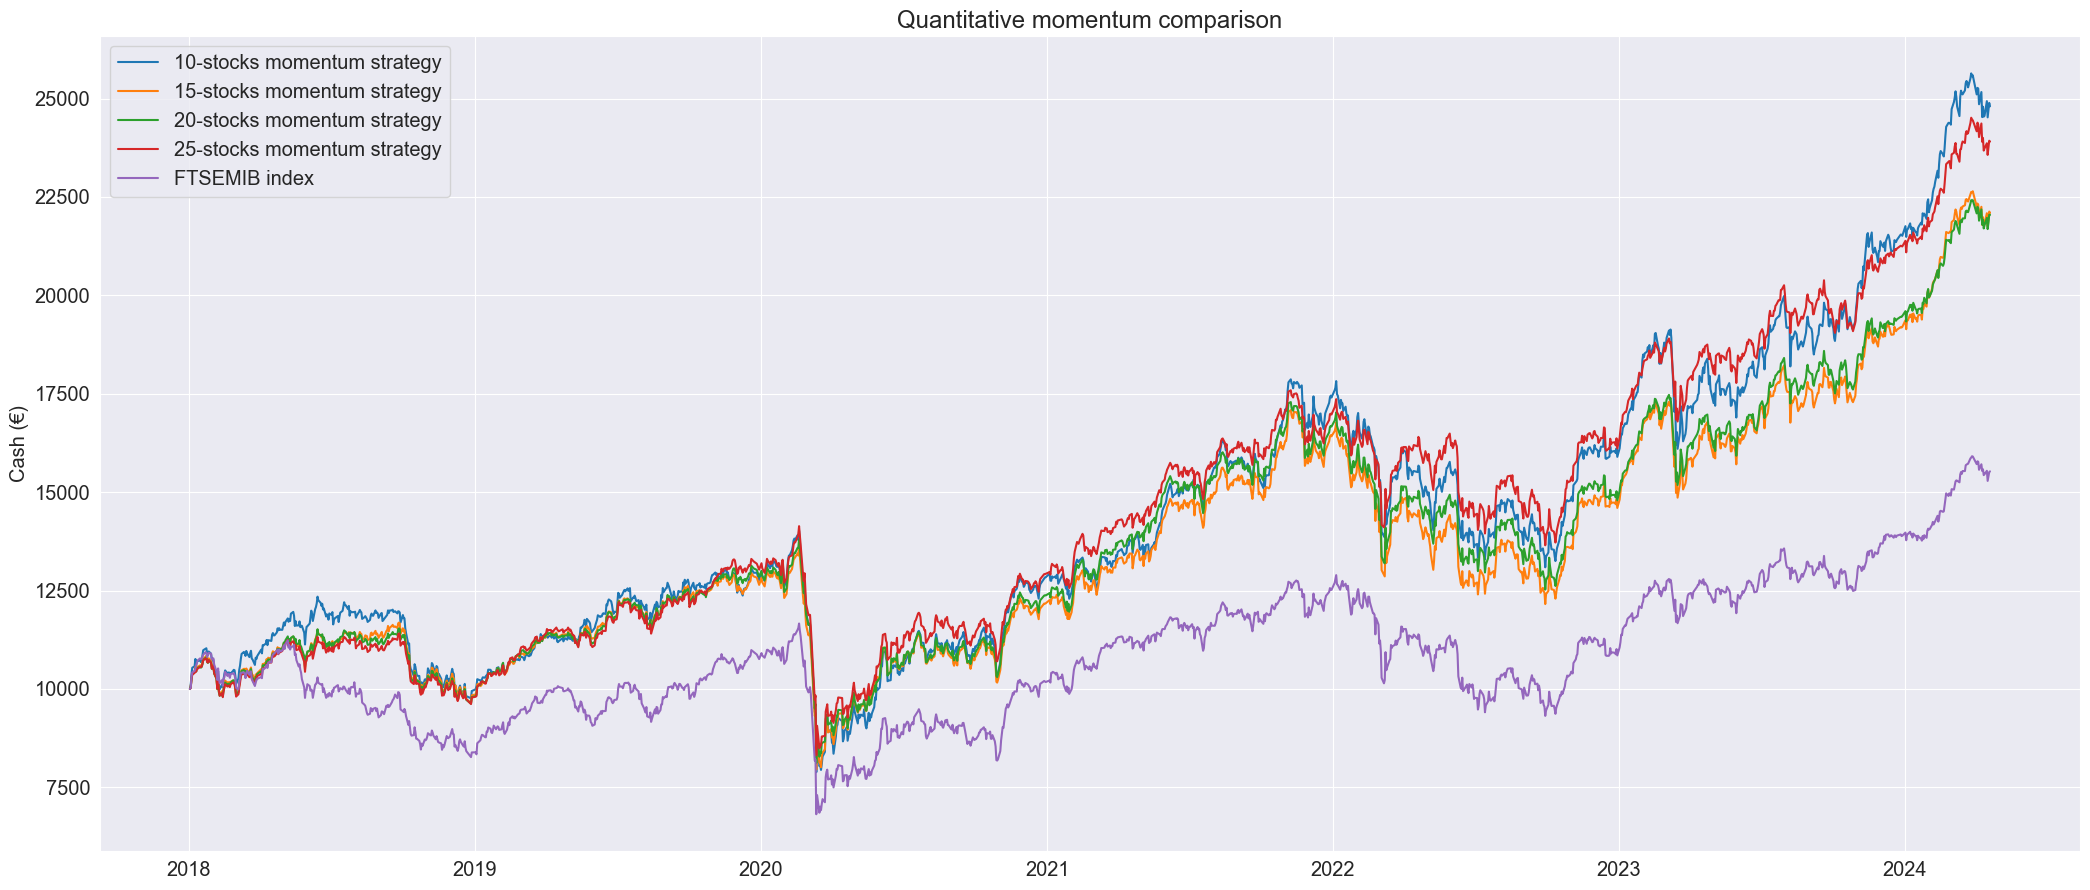

In [6]:
fig2, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

for size in sizes:
    strategy_performance = (qm_strategies[size].history['strategy cumulative returns'] +
                            qm_strategies[size].history['available money'])
    ax.plot(strategy_performance, label=f'{size}-stocks momentum strategy')

ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Quantitative momentum comparison', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()

# Easy Rebalance VS Momentum

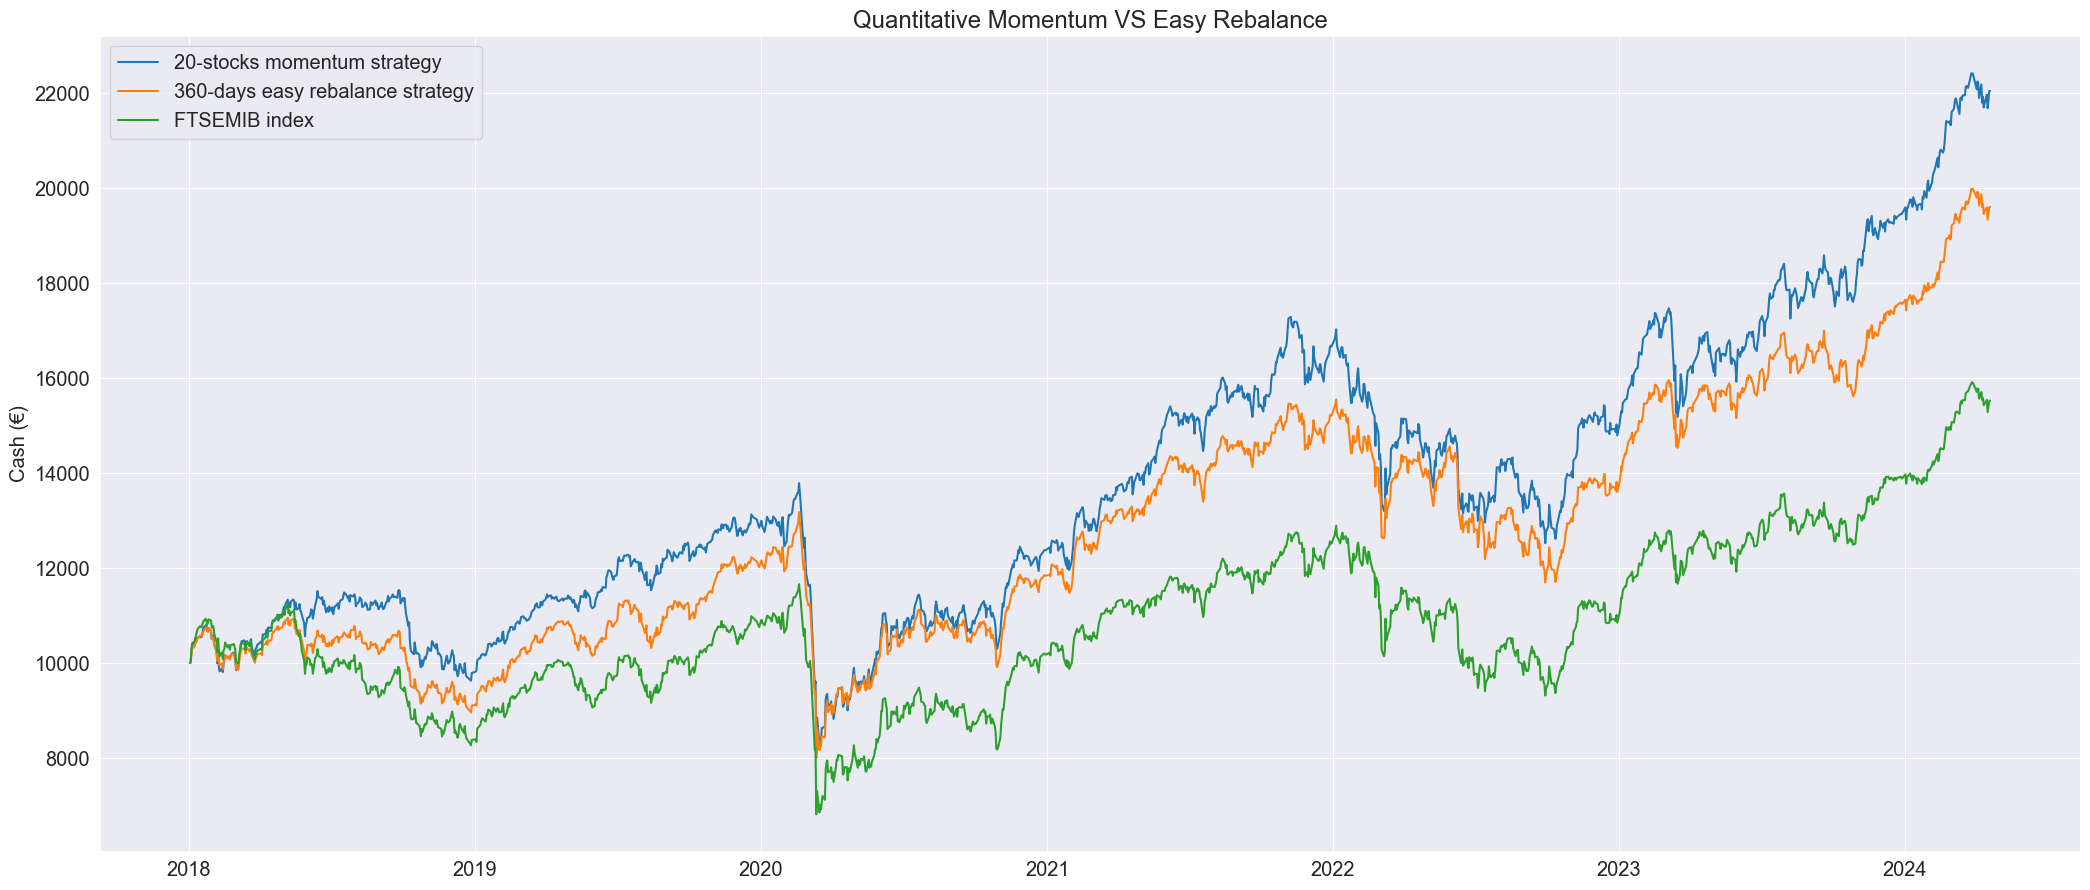

In [9]:
fig3, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

momentum_stocks = 20
easy_rebalance_frequency = 360

qm_performance = (qm_strategies[momentum_stocks].history['strategy cumulative returns'] +
                        qm_strategies[momentum_stocks].history['available money'])
er_performance = (er_strategies[easy_rebalance_frequency].history['strategy cumulative returns'] +
                        er_strategies[easy_rebalance_frequency].history['available money'])

ax.plot(qm_performance, label=f'{momentum_stocks}-stocks momentum strategy')
ax.plot(er_performance, label=f'{easy_rebalance_frequency}-days easy rebalance strategy')
ax.plot(benchmark, label='FTSEMIB index')

ax.legend(fontsize='x-large')
ax.set_title('Quantitative Momentum VS Easy Rebalance', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.set_ylabel("Cash (€)", fontsize='x-large')

plt.show()